# Mortgage Loan Export


### Aim: To predict mortgage backed securities prepayment risk using machine learning models

####( Yashav Shukla )

####First Tasks  :

- In this notebook we will perform Data Preprocessing and Labelling individually on the available datasets

1. Data Cleaning
2. Data Encoding
3. Data Labelling




In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# Load the dataset
data = pd.read_csv("/content/LoanExport.csv")

In [51]:
data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [52]:
data.shape

(16552, 28)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16552 entries, 0 to 16551
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         16552 non-null  int64  
 1   FirstPaymentDate    16552 non-null  int64  
 2   FirstTimeHomebuyer  16552 non-null  object 
 3   MaturityDate        16552 non-null  int64  
 4   MSA                 16552 non-null  object 
 5   MIP                 16552 non-null  int64  
 6   Units               16552 non-null  int64  
 7   Occupancy           16552 non-null  object 
 8   OCLTV               16552 non-null  int64  
 9   DTI                 16552 non-null  int64  
 10  OrigUPB             16552 non-null  int64  
 11  LTV                 16552 non-null  int64  
 12  OrigInterestRate    16552 non-null  float64
 13  Channel             16552 non-null  object 
 14  PPM                 16552 non-null  object 
 15  ProductType         16552 non-null  object 
 16  Prop

In [54]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,16552.0,557.343886,156.914538,0.000,584.000,607.0,618.00,625.0
FirstPaymentDate,16552.0,199904.819841,12.038899,199902.000,199903.000,199904.0,199905.00,200308.0
MaturityDate,16552.0,202901.842436,21.215395,202409.000,202902.000,202903.0,202904.00,203101.0
MIP,16552.0,13.005498,13.272688,0.000,0.000,12.0,25.00,52.0
Units,16552.0,1.024770,0.189738,1.000,1.000,1.0,1.00,4.0
OCLTV,16552.0,81.222994,12.664849,7.000,75.000,80.0,90.00,103.0
DTI,16552.0,30.673635,12.621718,0.000,24.000,32.0,39.00,65.0
OrigUPB,16552.0,121297.547124,52247.683283,13000.000,80000.000,115000.0,155000.00,400000.0
LTV,16552.0,81.209763,12.665664,7.000,75.000,80.0,90.00,100.0
OrigInterestRate,16552.0,7.046669,0.427952,4.875,6.875,7.0,7.25,10.5


In [55]:
data.isnull().sum()

CreditScore              0
FirstPaymentDate         0
FirstTimeHomebuyer       0
MaturityDate             0
MSA                      0
MIP                      0
Units                    0
Occupancy                0
OCLTV                    0
DTI                      0
OrigUPB                  0
LTV                      0
OrigInterestRate         0
Channel                  0
PPM                      0
ProductType              0
PropertyState            0
PropertyType             0
PostalCode               0
LoanSeqNum               0
LoanPurpose              0
OrigLoanTerm             0
NumBorrowers             0
SellerName            1441
ServicerName             0
EverDelinquent           0
MonthsDelinquent         0
MonthsInRepayment        0
dtype: int64

In [56]:
# Check for duplicated rows
duplicated_rows = data[data.duplicated()]
print("Number of duplicated rows:", len(duplicated_rows))

Number of duplicated rows: 0


In [57]:
# List of categorical columns
categorical_columns = ['FirstTimeHomebuyer', 'Occupancy', 'Channel', 'PPM', 'ProductType', 'PropertyState',
                       'PropertyType', 'LoanPurpose', 'SellerName', 'ServicerName']

# Explore unique values for each categorical column
for column in categorical_columns:
    unique_values = data[column].unique()
    print(f"Unique values for '{column}': {unique_values}")
    print(f"Number of unique values for '{column}': {len(unique_values)}\n")

Unique values for 'FirstTimeHomebuyer': ['N' 'X' 'Y']
Number of unique values for 'FirstTimeHomebuyer': 3

Unique values for 'Occupancy': ['O' 'I' 'S']
Number of unique values for 'Occupancy': 3

Unique values for 'Channel': ['T' 'R' 'C' 'B']
Number of unique values for 'Channel': 4

Unique values for 'PPM': ['N' 'X' 'Y']
Number of unique values for 'PPM': 3

Unique values for 'ProductType': ['FRM  ']
Number of unique values for 'ProductType': 1

Unique values for 'PropertyState': ['IL' 'CO' 'KS' 'CA' 'NJ' 'WI' 'FL' 'CT' 'GA' 'TX' 'MD' 'MA' 'SC' 'WY'
 'NC' 'AZ' 'IN' 'MS' 'NY' 'WA' 'AR' 'VA' 'MN' 'LA' 'PA' 'OR' 'RI' 'UT'
 'MI' 'TN' 'AL' 'MO' 'IA' 'NM' 'NV' 'VT' 'OH' 'NE' 'HI' 'ID' 'PR' 'DC'
 'GU' 'KY' 'NH' 'SD' 'ME' 'MT' 'OK' 'WV' 'DE' 'ND' 'AK']
Number of unique values for 'PropertyState': 53

Unique values for 'PropertyType': ['SF' 'PU' 'CO' 'MH' 'CP' 'LH']
Number of unique values for 'PropertyType': 6

Unique values for 'LoanPurpose': ['P' 'N' 'C']
Number of unique values for 'LoanPu

#EDA

### Univariate Analysis

In [58]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['CreditScore', 'FirstPaymentDate', 'MaturityDate', 'MIP', 'Units',
       'OCLTV', 'DTI', 'OrigUPB', 'LTV', 'OrigInterestRate', 'PostalCode',
       'OrigLoanTerm', 'EverDelinquent', 'MonthsDelinquent',
       'MonthsInRepayment'],
      dtype='object')

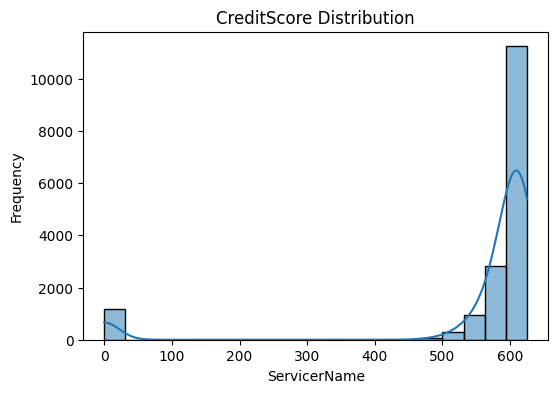

In [59]:
plt.figure(figsize=(6, 4))
sns.histplot(data['CreditScore'], bins=20, kde=True)
plt.title('CreditScore Distribution')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()

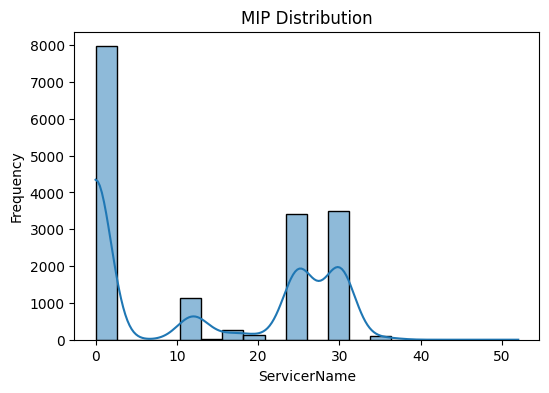

In [60]:
plt.figure(figsize=(6, 4))
sns.histplot(data['MIP'], bins=20, kde=True)
plt.title('MIP Distribution')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()

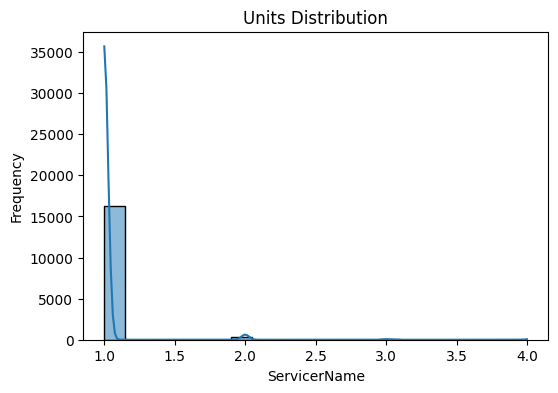

In [61]:
plt.figure(figsize=(6, 4))
sns.histplot(data['Units'], bins=20, kde=True)
plt.title('Units Distribution')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()

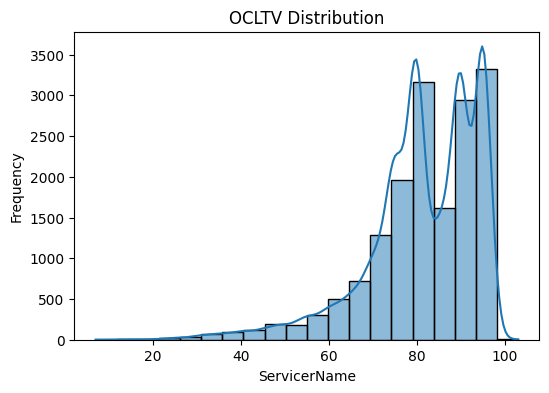

In [62]:
plt.figure(figsize=(6, 4))
sns.histplot(data['OCLTV'], bins=20, kde=True)
plt.title('OCLTV Distribution')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()

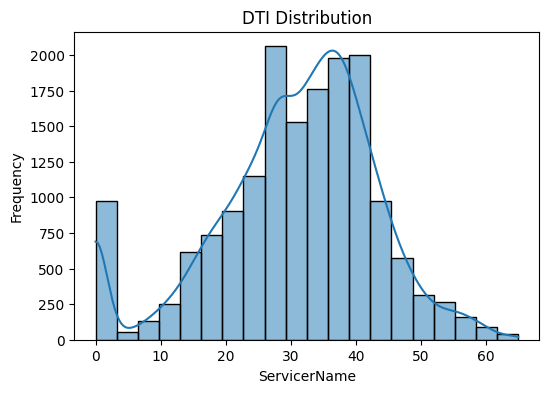

In [63]:
plt.figure(figsize=(6, 4))
sns.histplot(data['DTI'], bins=20, kde=True)
plt.title('DTI Distribution')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()

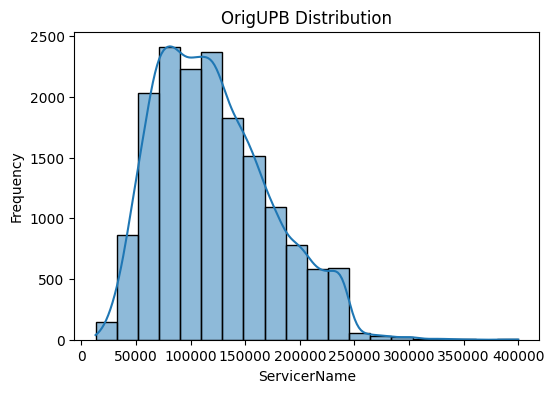

In [64]:
plt.figure(figsize=(6, 4))
sns.histplot(data['OrigUPB'], bins=20, kde=True)
plt.title('OrigUPB Distribution')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()

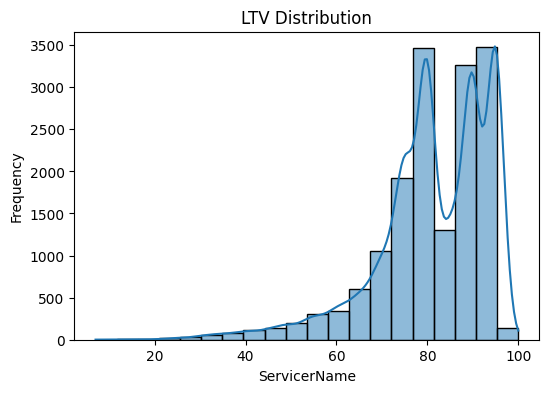

In [65]:
plt.figure(figsize=(6, 4))
sns.histplot(data['LTV'], bins=20, kde=True)
plt.title('LTV Distribution')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()

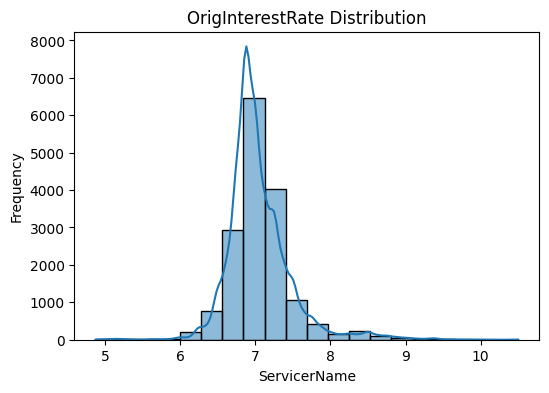

In [66]:
plt.figure(figsize=(6, 4))
sns.histplot(data['OrigInterestRate'], bins=20, kde=True)
plt.title('OrigInterestRate Distribution')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()

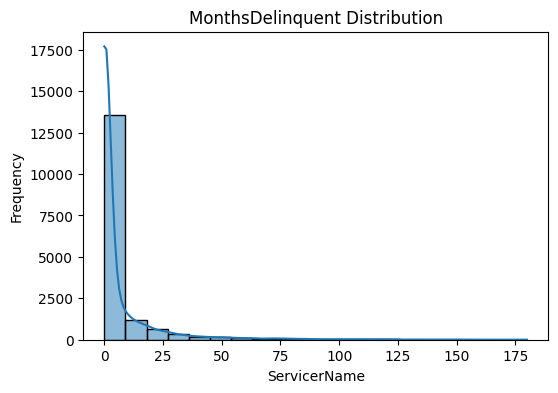

In [67]:
plt.figure(figsize=(6, 4))
sns.histplot(data['MonthsDelinquent'], bins=20, kde=True)
plt.title('MonthsDelinquent Distribution')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()

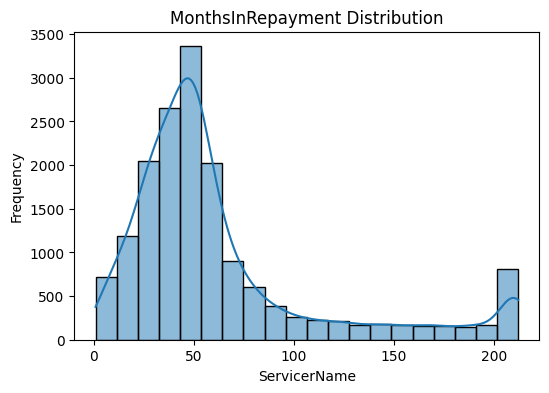

In [68]:
plt.figure(figsize=(6, 4))
sns.histplot(data['MonthsInRepayment'], bins=20, kde=True)
plt.title('MonthsInRepayment Distribution')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()

### Bivariate Analysis

In [69]:
categorical_columns

['FirstTimeHomebuyer',
 'Occupancy',
 'Channel',
 'PPM',
 'ProductType',
 'PropertyState',
 'PropertyType',
 'LoanPurpose',
 'SellerName',
 'ServicerName']

In [70]:
number_of_X_rows = data[(data['FirstTimeHomebuyer'] == "X") & (data['PPM'] == "X")]
print(f"Number of rows with 'X' values in both 'FirstTimeHomebuyer' and 'PPM' columns: {len(number_of_X_rows)}")

Number of rows with 'X' values in both 'FirstTimeHomebuyer' and 'PPM' columns: 35


In [71]:
number_of_X_rows = data[(data['FirstTimeHomebuyer'] == "X")]
print(f"Number of rows with 'X' values in both 'FirstTimeHomebuyer' and 'PPM' columns: {len(number_of_X_rows)}")

Number of rows with 'X' values in both 'FirstTimeHomebuyer' and 'PPM' columns: 4562


In [72]:
number_of_X_rows = data[(data['PPM'] == "X")]
print(f"Number of rows with 'X' values in both 'FirstTimeHomebuyer' and 'PPM' columns: {len(number_of_X_rows)}")

Number of rows with 'X' values in both 'FirstTimeHomebuyer' and 'PPM' columns: 344


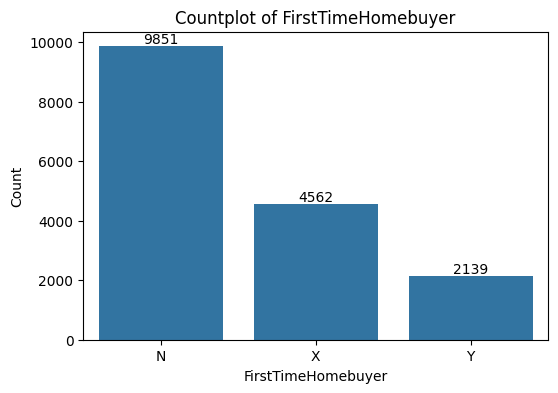

In [73]:
# Countplot for categorical variables
plt.figure(figsize=(6, 4))
ax = sns.countplot(x="FirstTimeHomebuyer", data=data)
plt.title("Countplot of FirstTimeHomebuyer")
plt.xlabel("FirstTimeHomebuyer")
plt.ylabel("Count")

# Annotate each bar with its corresponding count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

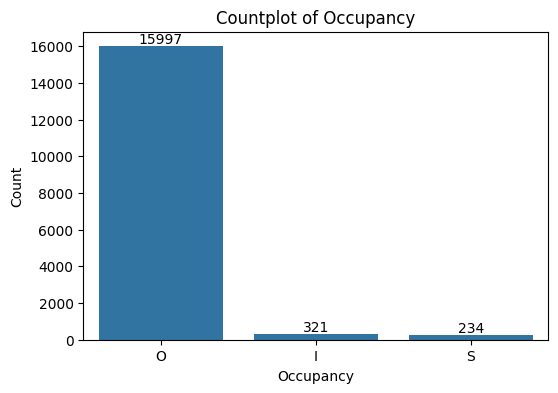

In [74]:
# Countplot for categorical variables
plt.figure(figsize=(6, 4))
ax = sns.countplot(x="Occupancy", data=data)
plt.title("Countplot of Occupancy")
plt.xlabel("Occupancy")
plt.ylabel("Count")

# Annotate each bar with its corresponding count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

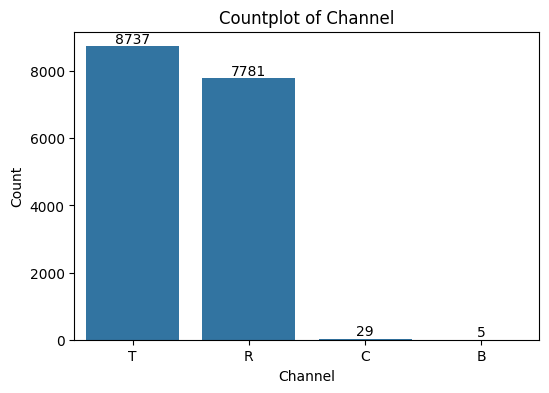

In [75]:
# Countplot for categorical variables
plt.figure(figsize=(6, 4))
ax = sns.countplot(x="Channel", data=data)
plt.title("Countplot of Channel")
plt.xlabel("Channel")
plt.ylabel("Count")

# Annotate each bar with its corresponding count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

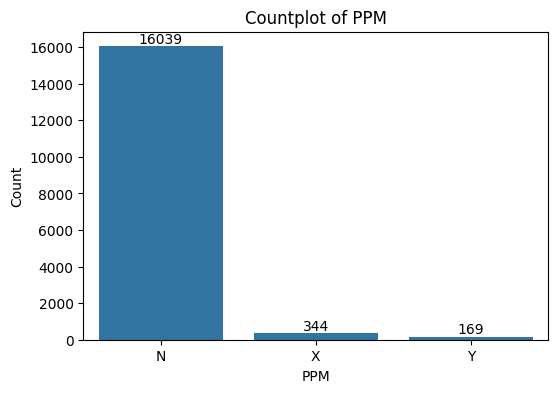

In [76]:
# Countplot for categorical variables
plt.figure(figsize=(6, 4))
ax = sns.countplot(x="PPM", data=data)
plt.title("Countplot of PPM")
plt.xlabel("PPM")
plt.ylabel("Count")

# Annotate each bar with its corresponding count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

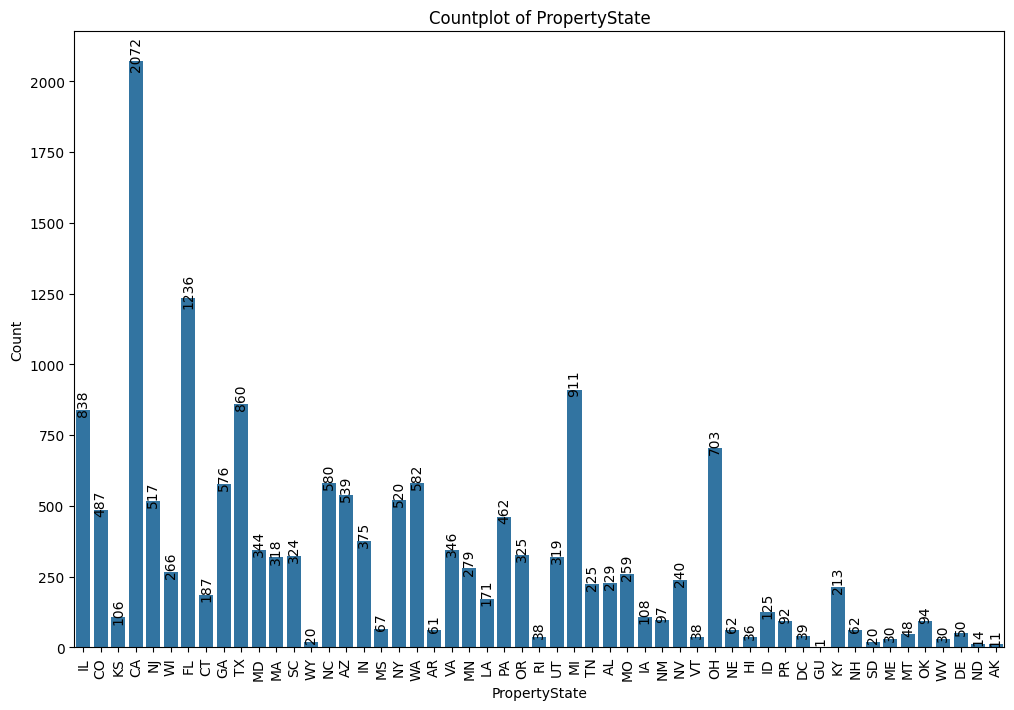

In [77]:
# Countplot for categorical variables
plt.figure(figsize=(12, 8))
ax = sns.countplot(x="PropertyState", data=data)
plt.title("Countplot of PropertyState")
plt.xlabel("PropertyState")
plt.ylabel("Count")

# Annotate each bar with its corresponding count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                fontsize=10, color='black', xytext=(0, 5), textcoords='offset points', rotation=90)

plt.xticks(rotation=90)
plt.show()

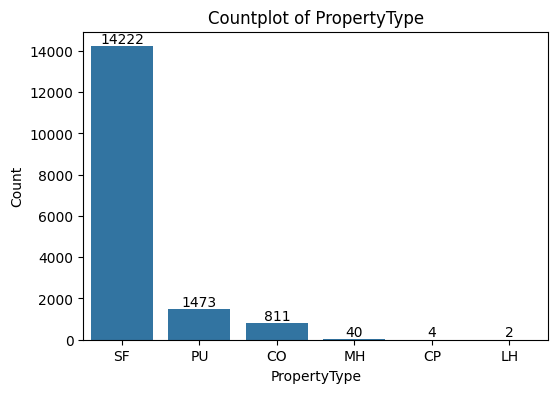

In [78]:
# Countplot for categorical variables
plt.figure(figsize=(6, 4))
ax = sns.countplot(x="PropertyType", data=data)
plt.title("Countplot of PropertyType")
plt.xlabel("PropertyType")
plt.ylabel("Count")

# Annotate each bar with its corresponding count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

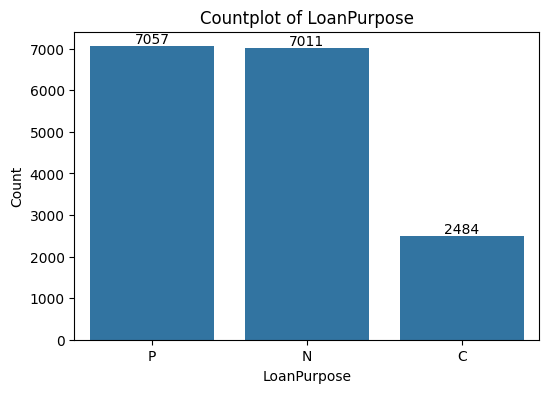

In [79]:
# Countplot for categorical variables
plt.figure(figsize=(6, 4))
ax = sns.countplot(x="LoanPurpose", data=data)
plt.title("Countplot of LoanPurpose")
plt.xlabel("LoanPurpose")
plt.ylabel("Count")

# Annotate each bar with its corresponding count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

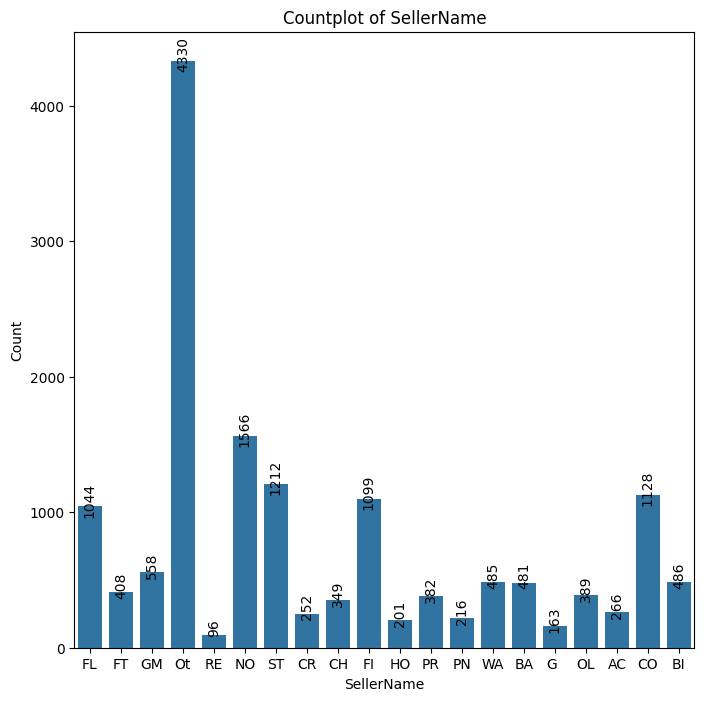

In [80]:
# Countplot for categorical variables
plt.figure(figsize=(8, 8))
ax = sns.countplot(x="SellerName", data=data)
plt.title("Countplot of SellerName")
plt.xlabel("SellerName")
plt.ylabel("Count")

# Annotate each bar with its corresponding count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                fontsize=10, color='black', xytext=(0, 5), textcoords='offset points', rotation=90)

plt.show()

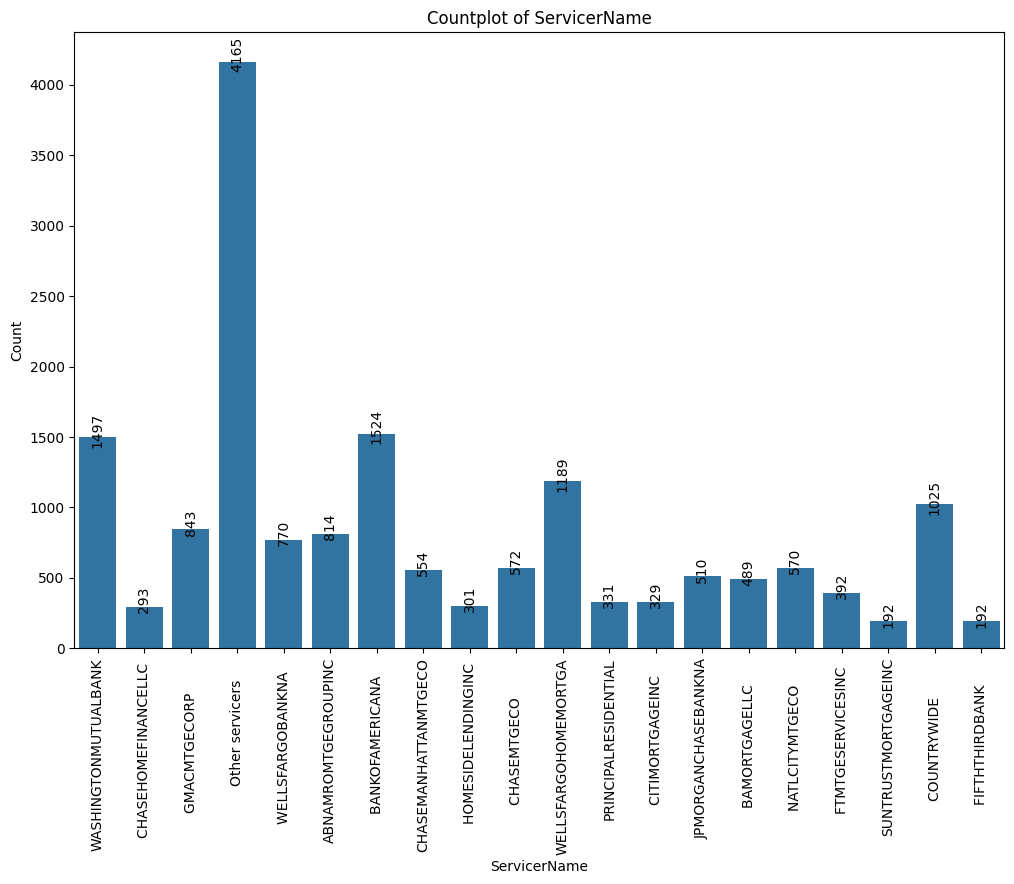

In [81]:
# Countplot for categorical variables
plt.figure(figsize=(12, 8))
ax = sns.countplot(x="ServicerName", data=data)
plt.title("Countplot of ServicerName")
plt.xlabel("ServicerName")
plt.ylabel("Count")

# Annotate each bar with its corresponding count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                fontsize=10, color='black', xytext=(0, 5), textcoords='offset points', rotation=90)
plt.xticks(rotation=90)
plt.show()

### Multivariate Analysis

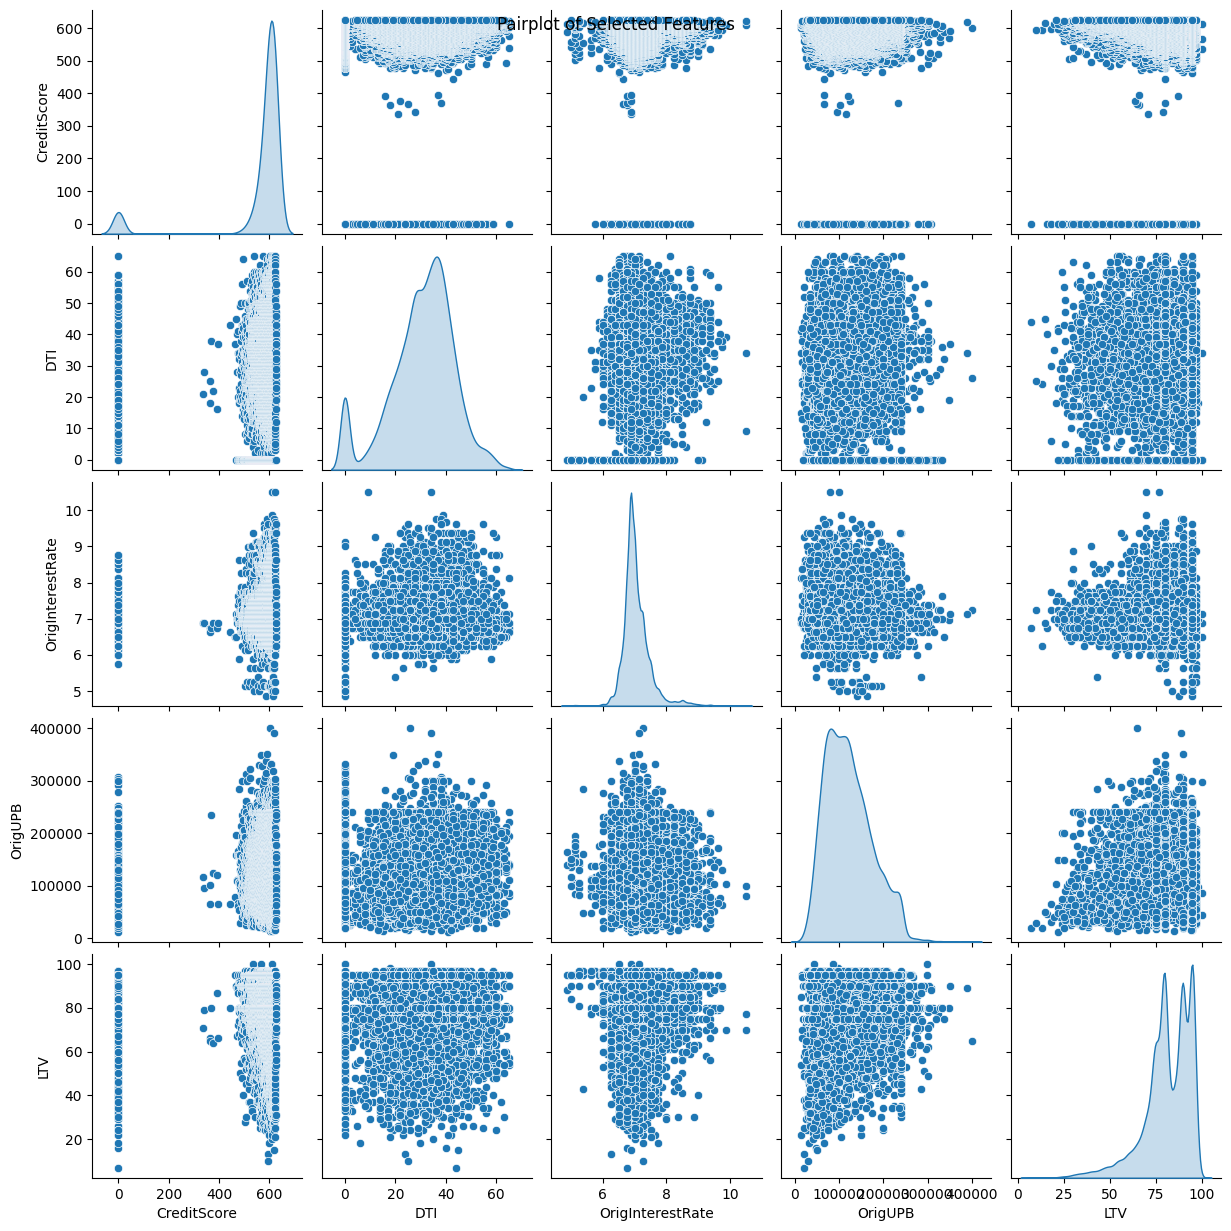

In [82]:
# Pairplot for selected features
selected_features = ['CreditScore', 'DTI', 'OrigInterestRate', 'OrigUPB', 'LTV']
sns.pairplot(data=data[selected_features], diag_kind='kde')
plt.suptitle('Pairplot of Selected Features')
plt.show()

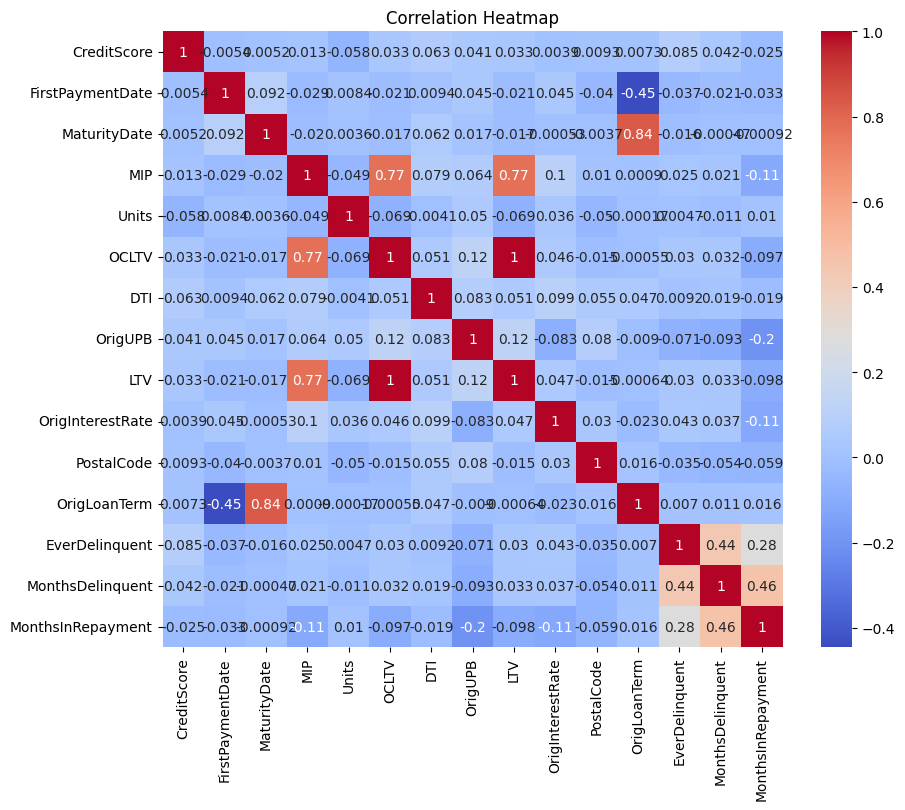

In [83]:
# Select only the numeric columns
numeric_columns = data.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# data cleaning

In [84]:
#credit score column
data['CreditScore'].unique()

array([  0, 335, 342, 363, 366, 370, 375, 391, 396, 445, 462, 466, 471,
       476, 477, 478, 479, 481, 482, 483, 485, 486, 487, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504,
       505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517,
       518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530,
       531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543,
       544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556,
       557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569,
       570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582,
       583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595,
       596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608,
       609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621,
       622, 623, 624, 625])

In [85]:
data['CreditScore'].mean()

557.3438859352344

In [86]:
data.loc[(data['CreditScore'] < 300) | (data['CreditScore'] > 850),'CreditScore']=data['CreditScore'].mean()

In [87]:
data['FirstTimeHomebuyer'].unique()

array(['N', 'X', 'Y'], dtype=object)

In [88]:
data['FirstTimeHomebuyer'].mode()[0]

'N'

In [89]:
data.loc[data['FirstTimeHomebuyer'] == 'X','FirstTimeHomebuyer']=data['FirstTimeHomebuyer'].mode()[0]

In [90]:
data['FirstTimeHomebuyer'].unique()

array(['N', 'Y'], dtype=object)

In [91]:
data['MSA'].unique()

array(['16974', '19740', '29940', '31084', '35644', 'X    ', '36740',
       '25540', '48620', '12060', '12420', '13140', '13644', '15764',
       '16700', '16940', '17900', '19124', '20500', '20764', '21340',
       '22380', '22744', '23060', '23104', '24660', '24860', '25060',
       '26900', '27060', '27140', '27260', '28420', '29404', '30780',
       '31340', '33124', '33340', '33460', '34820', '35004', '35084',
       '35380', '37100', '38060', '38300', '38900', '39300', '39340',
       '39820', '40060', '40140', '40900', '41180', '41620', '41700',
       '41740', '41884', '42044', '42220', '42644', '43900', '46060',
       '46700', '47644', '47894', '49180', '49420', '11340', '12100',
       '14500', '17820', '17860', '19340', '19804', '28140', '29740',
       '36084', '36500', '37460', '42060', '47260', '48424', '12580',
       '14484', '14860', '19380', '26420', '29420', '29620', '36540',
       '37764', '37860', '37964', '38940', '40380', '45300', '19660',
       '11300', '114

In [92]:
data['MSA']=data['MSA'].replace('X    ',method='bfill')

data['MSA']=data['MSA'].astype(int)

In [93]:
data['MSA'].unique()

array([16974, 19740, 29940, 31084, 35644, 36740, 25540, 48620, 12060,
       12420, 13140, 13644, 15764, 16700, 16940, 17900, 19124, 20500,
       20764, 21340, 22380, 22744, 23060, 23104, 24660, 24860, 25060,
       26900, 27060, 27140, 27260, 28420, 29404, 30780, 31340, 33124,
       33340, 33460, 34820, 35004, 35084, 35380, 37100, 38060, 38300,
       38900, 39300, 39340, 39820, 40060, 40140, 40900, 41180, 41620,
       41700, 41740, 41884, 42044, 42220, 42644, 43900, 46060, 46700,
       47644, 47894, 49180, 49420, 11340, 12100, 14500, 17820, 17860,
       19340, 19804, 28140, 29740, 36084, 36500, 37460, 42060, 47260,
       48424, 12580, 14484, 14860, 19380, 26420, 29420, 29620, 36540,
       37764, 37860, 37964, 38940, 40380, 45300, 19660, 11300, 11460,
       12220, 12940, 13820, 13980, 14740, 15540, 16740, 17140, 17460,
       17780, 22220, 23420, 23844, 24340, 24780, 26180, 27620, 31420,
       31540, 34980, 35300, 39100, 39580, 39900, 40420, 41940, 41980,
       42020, 45940,

In [94]:
data['MIP'].unique()

array([25,  0, 30, 12, 35, 29, 17, 18, 20, 22,  6, 14, 33, 16, 52, 36, 28,
       11, 45, 15, 27])

In [95]:
data.loc[data['MIP'] > 55, 'MIP']=data['MIP'].mean()

In [96]:
data['MIP'].mean()

13.00549782503625

In [97]:
data['Units'].unique()

array([1, 2, 4, 3])

In [99]:
data.loc[data['Units']==0,'Units']=data['Units'].mode()[0]

In [100]:
data['Units'].unique()

array([1, 2, 4, 3])

In [101]:
data['OCLTV'].unique()

array([ 89,  73,  75,  76,  78,  90,  72,  95,  80,  77,  85,  93,  70,
        74,  79,  62,  44,  32,  64,  91,  53,  69,  60,  54,  52,  84,
        68,  36,  55,  96,  97,  46,  58,  63,  83,  87,  94,  86,  50,
        45,  71,  61,  42,  59,  57,  48,  51,  67,  81,  66,  82,  88,
        26,  30,  24,  34,  37,  65,  31, 100,   7,  38,  39,  16,  41,
        33,  18,  22,  35,  92,  40,  56,  29,  43,  28,  47,  49,  25,
        98,  27, 103,  13,  10,  23,  20,  15,  21])

In [102]:
data['DTI'].unique()

array([27, 17, 16, 14, 18, 40, 21, 20, 38, 19, 23, 45, 28, 29, 15, 43, 25,
       24, 26, 35, 46, 39, 33, 48, 30, 31, 22, 56, 32, 12,  6, 37, 36, 42,
       34, 11, 41,  8, 44, 55,  0, 13, 53, 10,  9, 51,  7, 47, 65, 54,  2,
       57,  5,  3,  4, 50, 59, 49, 52, 64, 60, 58, 62,  1, 61, 63])

In [105]:
data.loc[(data['DTI'] < 1) | (data['DTI'] > 65),'DTI'] = data['DTI'].mean()

In [106]:
data['DTI'].unique()

array([27.        , 17.        , 16.        , 14.        , 18.        ,
       40.        , 21.        , 20.        , 38.        , 19.        ,
       23.        , 45.        , 28.        , 29.        , 15.        ,
       43.        , 25.        , 24.        , 26.        , 35.        ,
       46.        , 39.        , 33.        , 48.        , 30.        ,
       31.        , 22.        , 56.        , 32.        , 12.        ,
        6.        , 37.        , 36.        , 42.        , 34.        ,
       11.        , 41.        ,  8.        , 44.        , 55.        ,
       30.67363461, 13.        , 53.        , 10.        ,  9.        ,
       51.        ,  7.        , 47.        , 65.        , 54.        ,
        2.        , 57.        ,  5.        ,  3.        ,  4.        ,
       50.        , 59.        , 49.        , 52.        , 64.        ,
       60.        , 58.        , 62.        ,  1.        , 61.        ,
       63.        ])

In [115]:
data.loc[(data['LTV'] < 1) | (data['LTV'] > 998),'LTV'] = data['LTV'].mean()

In [108]:
data['PPM'].unique()

array(['N', 'X', 'Y'], dtype=object)

In [110]:
data['PropertyType'].unique()

array(['SF', 'PU', 'CO', 'MH', 'CP', 'LH'], dtype=object)

In [111]:
data['PropertyType'].unique()

array(['SF', 'PU', 'CO', 'MH', 'CP', 'LH'], dtype=object)

In [112]:
data['NumBorrowers'].unique()

array(['2', '1', 'X '], dtype=object)

In [123]:
data.loc[data['NumBorrowers']=='X ','NumBorrowers']=data['NumBorrowers'].mode()[0]

In [114]:
data['NumBorrowers'].unique()

array(['2', '1', 'X '], dtype=object)

In [117]:
data.duplicated().sum()  # no duplicates

0

In [119]:
data['SellerName'].unique() #we can drop this column

array(['FL', 'FT', 'GM', 'Ot', 'RE', 'NO', 'ST', 'CR', 'CH', 'FI', 'HO',
       'PR', nan, 'PN', 'WA', 'BA', 'G ', 'OL', 'AC', 'CO', 'BI'],
      dtype=object)

In [120]:
data['ServicerName'].unique()

array(['WASHINGTONMUTUALBANK', 'CHASEHOMEFINANCELLC ',
       'GMACMTGECORP        ', 'Other servicers     ',
       'WELLSFARGOBANKNA   ', 'ABNAMROMTGEGROUPINC',
       'BANKOFAMERICANA    ', 'CHASEMANHATTANMTGECO',
       'HOMESIDELENDINGINC ', 'CHASEMTGECO         ',
       'WELLSFARGOHOMEMORTGA', 'PRINCIPALRESIDENTIAL',
       'CITIMORTGAGEINC    ', 'JPMORGANCHASEBANKNA',
       'BAMORTGAGELLC      ', 'NATLCITYMTGECO      ',
       'FTMTGESERVICESINC  ', 'SUNTRUSTMORTGAGEINC',
       'COUNTRYWIDE         ', 'FIFTHTHIRDBANK      '], dtype=object)

In [121]:
data['LoanSeqNum'].unique()   #we can drop this (its just like an id to get the loan details)

array(['F199Q1268030', 'F199Q1015092', 'F199Q1266886', ...,
       'F199Q1204632', 'F199Q1177589', 'F199Q1180106'], dtype=object)

In [124]:
columns_to_drop = ['LoanSeqNum', 'SellerName']
data.drop(columns=columns_to_drop, axis=1, inplace=True)

# Data Labelling

In [125]:
target_column = data['EverDelinquent']

data=data.drop(columns=['EverDelinquent'])
data['EverDelinquent'] =target_column

In [126]:
data

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PropertyState,PropertyType,PostalCode,LoanPurpose,OrigLoanTerm,NumBorrowers,ServicerName,MonthsDelinquent,MonthsInRepayment,EverDelinquent
0,557.343886,199902,N,202901,16974,25.0,1,O,89,27.0,...,IL,SF,60400,P,360,2,WASHINGTONMUTUALBANK,0,52,0
1,557.343886,199902,N,202901,19740,0.0,1,O,73,17.0,...,CO,SF,80200,N,360,1,CHASEHOMEFINANCELLC,0,144,0
2,557.343886,199902,N,202901,29940,0.0,1,O,75,16.0,...,KS,SF,66000,N,360,2,WASHINGTONMUTUALBANK,0,67,0
3,557.343886,199902,N,202901,31084,0.0,1,O,76,14.0,...,CA,SF,90700,N,360,2,GMACMTGECORP,0,35,0
4,557.343886,199902,N,202901,35644,0.0,1,O,78,18.0,...,NJ,SF,7600,N,360,2,GMACMTGECORP,0,54,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16547,625.000000,199903,N,202902,30700,0.0,3,O,80,34.0,...,NE,SF,68500,P,360,1,CITIMORTGAGEINC,1,80,1
16548,625.000000,199903,N,202902,31084,0.0,1,O,31,32.0,...,CA,SF,90700,C,360,1,Other servicers,0,36,0
16549,625.000000,199903,N,202902,31084,0.0,1,O,77,37.0,...,CA,SF,91300,N,360,1,BAMORTGAGELLC,0,35,0
16550,625.000000,199903,N,202902,31084,25.0,1,O,85,56.0,...,CA,SF,91700,N,360,2,GMACMTGECORP,0,21,0


In [127]:
data.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanPurpose', 'OrigLoanTerm',
       'NumBorrowers', 'ServicerName', 'MonthsDelinquent', 'MonthsInRepayment',
       'EverDelinquent'],
      dtype='object')

# Data Encoding

In [128]:
from sklearn.preprocessing import LabelEncoder

In [129]:
encoder=LabelEncoder()

In [130]:
data['Occupancy']=encoder.fit_transform(data['Occupancy'])
data['PropertyState']=encoder.fit_transform(data['PropertyState'])
data['PropertyType']=encoder.fit_transform(data['PropertyType'])
data['ServicerName']=encoder.fit_transform(data['ServicerName'])
data['LoanPurpose']=encoder.fit_transform(data['LoanPurpose'])
data['Channel']=encoder.fit_transform(data['Channel'])

In [131]:
d2=pd.get_dummies(data['FirstTimeHomebuyer'],prefix='FirstTimeHomebuyer')
data=pd.concat([data, d2], axis=1)
data=data.drop(columns=['FirstTimeHomebuyer'])

In [132]:
d3=pd.get_dummies(data['PPM'],prefix='PPM')
data=pd.concat([data, d3], axis=1)
data=data.drop(columns=['PPM'])

In [133]:
print(data.describe())

        CreditScore  FirstPaymentDate   MaturityDate           MSA  \
count  16552.000000      16552.000000   16552.000000  16552.000000   
mean     597.380249     199904.819841  202901.842436  28859.202030   
std       26.529127         12.038899      21.215395  12012.831191   
min      335.000000     199902.000000  202409.000000  10180.000000   
25%      584.000000     199903.000000  202902.000000  16974.000000   
50%      607.000000     199904.000000  202903.000000  30700.000000   
75%      618.000000     199905.000000  202904.000000  39340.000000   
max      625.000000     200308.000000  203101.000000  49740.000000   

                MIP         Units     Occupancy         OCLTV           DTI  \
count  16552.000000  16552.000000  16552.000000  16552.000000  16552.000000   
mean      13.005498      1.024770      0.994744     81.222994     32.432291   
std       13.272688      0.189738      0.183044     12.664849     10.112718   
min        0.000000      1.000000      0.000000      

In [134]:
data_cleaned = data.dropna()


In [135]:
data_encoded = pd.get_dummies(data_cleaned)

In [136]:
cleaned_file_path = "cleaned_data new Loan Export.csv"
data_encoded.to_csv(cleaned_file_path, index=False)
print("Cleaned and encoded data saved to:", cleaned_file_path)

Cleaned and encoded data saved to: cleaned_data new Loan Export.csv
